# **K Nearest Neighbors Classification**

## Visualization for K nearest neighbors

<img src = "https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png">

In [1]:
import itertools
import sklearn 
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import wget
%matplotlib inline

## ***Get the data***

 ### 1- Basic Service    2- E-Service    3- Plus Service    4- Total Service

In [2]:
# wget.download("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv", "Telecust.csv")

In [3]:
tele_data = pd.read_csv("Telecust.csv")
tele_data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
print(tele_data.columns)
print("\n\nSize: ",tele_data.shape)

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')


Size:  (1000, 12)


## ***Data Visualization and Analysis***

In [5]:
# See how many of each category are present in dataset

tele_data["custcat"].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

<AxesSubplot:xlabel='income', ylabel='Count'>

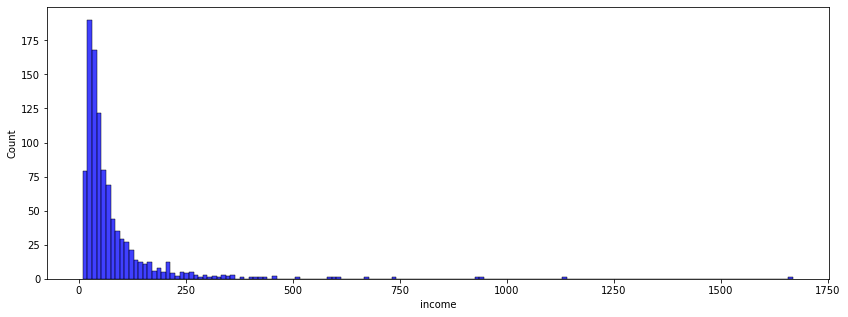

In [6]:
plt.figure(figsize=(14,5))
sns.histplot(data=tele_data.income, color='blue')

### Extract features

In [7]:
tele_data.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [8]:
# Inputs

x = tele_data[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']]

x.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


In [9]:
y = tele_data.custcat

y.head()

0    1
1    4
2    3
3    1
4    3
Name: custcat, dtype: int64

## Normalize data

In [10]:
# x= preprocessing.StandardScaler().fit(x).transform(x.astype(float))
# x[:5]

In [11]:
x.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


## Split the data into train & test sets

In [12]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2,random_state=42)
print("Training set: ",train_x.shape)
print("Test set: ",test_x.shape)

Training set:  (800, 11)
Test set:  (200, 11)


In [13]:
train_x.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
29,2,13,33,1,9,19.0,4,0,0.0,1,2
535,3,31,34,0,9,105.0,4,7,0.0,1,4
695,1,72,75,0,37,33.0,1,44,1.0,1,1
557,1,10,23,0,4,36.0,2,1,0.0,0,3
836,1,72,59,1,12,65.0,3,21,0.0,1,6


In [14]:
test_x.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
521,1,48,41,0,21,43.0,2,7,0.0,0,1
737,1,15,38,1,11,46.0,5,11,0.0,0,3
740,3,34,29,0,5,26.0,3,4,0.0,1,2
660,2,45,54,0,25,171.0,3,33,0.0,1,1
411,3,5,31,0,1,21.0,3,1,0.0,1,2


In [15]:
test_y.head()

521    2
737    1
740    2
660    3
411    1
Name: custcat, dtype: int64

# Classification: K nearest neighbors: 4 neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=4).fit(train_x, train_y)
knn

KNeighborsClassifier(n_neighbors=4)

## Predictions

In [18]:
yhat = knn.predict(test_x)
yhat[:6]

array([3, 2, 1, 3, 1, 1], dtype=int64)

## Model evaluation

In [19]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(train_y, knn.predict(train_x))*100)
print("Test set Accuracy: ", metrics.accuracy_score(test_y, yhat)*100)

Train set Accuracy:  55.75
Test set Accuracy:  30.0


# Classification K nearest neighbors: 6 neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn2 = KNeighborsClassifier(n_neighbors=6)
knn2.fit(train_x, train_y)

# Get predictions
yhat1 = knn2.predict(test_x)

# Accuracy
print("Train accuarcy: ", accuracy_score(train_y, knn2.predict(train_x))*100)
print("Test accuracy: ", accuracy_score(test_y, yhat1)*100)

Train accuarcy:  51.625
Test accuracy:  33.0


## K: The hyperparameter: My Method

In [21]:
m = 10
acc = []
for i in range(1,m):
    tempknn = KNeighborsClassifier(n_neighbors=i)
    tempknn.fit(train_x, train_y)
    tempyhat = tempknn.predict(test_x)
    acc.append(accuracy_score(test_y, tempyhat))
    
print("The accuracies are: ",acc,"\n\n")

maxacc = max(acc)
maxindex = acc.index(maxacc)+1
print("The maximum accuracy is ",maxacc," for K:", maxindex)

The accuracies are:  [0.305, 0.32, 0.33, 0.3, 0.33, 0.33, 0.335, 0.325, 0.31] 


The maximum accuracy is  0.335  for K: 7


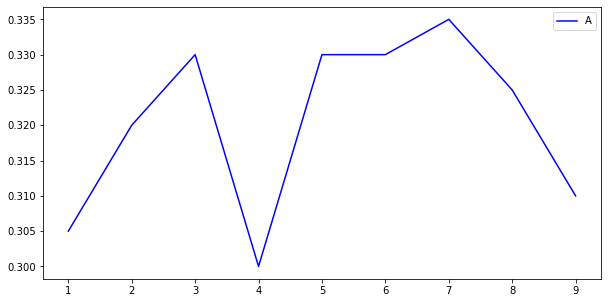

In [22]:
plt.figure(figsize=(10,5))
plt.plot(range(1,10), acc, c="blue")
plt.legend("Accuracy")

## K value: IBM method

In [23]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(train_x,train_y)
    yhat=neigh.predict(test_x)
    mean_acc[n-1] = metrics.accuracy_score(test_y, yhat)

    
    std_acc[n-1]=np.std(yhat==test_y)/np.sqrt(yhat.shape[0])

mean_acc

array([0.305, 0.32 , 0.33 , 0.3  , 0.33 , 0.33 , 0.335, 0.325, 0.31 ])

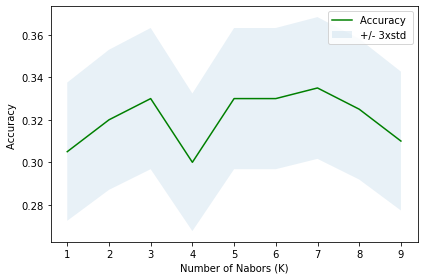

In [24]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

# K nearest neighbors: 7 neighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn2 = KNeighborsClassifier(n_neighbors=7)
knn2.fit(train_x, train_y)

# Get predictions
yhat1 = knn2.predict(test_x)

# Accuracy
print("Train accuarcy: ", accuracy_score(train_y, knn2.predict(train_x))*100)
print("Test accuracy: ", accuracy_score(test_y, yhat1)*100)

Train accuarcy:  49.75
Test accuracy:  33.5


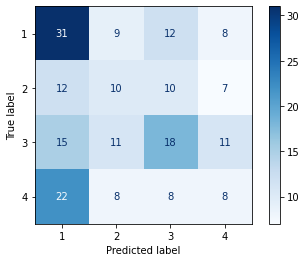

In [27]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knn2, test_x, test_y, cmap=plt.cm.Blues)

### Very bad confusion matrix as all the values are spread everywhere